<div class="jumbotron">
  <h1><CENTER><I>Market Research</I> </CENTER></h1>
  <hr>
    <h2 class="display-4"> <I> Scenario </I></h2>
  <p class="lead" style="text-align: justify"><I> Your food company wants to expand in foreign countries. It is  specialized in chicken! The range of possibilities is wide: no particular country or continent is currently chosen. All countries are possible!
Your goal will be to help target specific countries in order to further deepen the market research. In particular, the ideal would be to produce "groups" of countries, larger or smaller, whose characteristics are known.
In the first place, the strategy is rather to export the products rather than produce on the spot, ie in the new target country(ies).</I></p>
  <hr class="my-4">
</div>

<div class="alert alert-success" role="alert">
  <h2 class="alert-heading">Skills</h2>
  <hr>
  <ul class="lead" style="list-style-type:disc;">
  <li>Descriptive statistics</li>
  <li>Automatic classification</li>
  <li>Interpret a PCA</li>
  <li>Test the adequacy to a law by a statistical test</li>
  <li>Build and read a dendogram</li>
</ul>
  <hr>
</div>

# Table of contents
**[I. Data Preparation](#I)**
- [1. Installing and loading packages](#I1)
- [2. Loading data](#I2)
     - [a. pop: Population difference between 2015 and 2016, expressed as a percentage](#I2a)
     - [b. disp_ali: Food Availability](#I2b)
     - [c. pib_hab: GDP per capita](#I2c)
     - [d. political stability: Political stability in the country](#I2d)
     - [e. risk: Risk in the country](#I2e)
     - [f. distances: Distances between France and other countries](#I2f)
- [3. data: General data](#I3)

**[II.Hierarchical ascending classification](#II)**.
- [1. Realization](#II1)
- [2. Characterization of clusters](#II2)

**[III. Principal Component Analysis](#III)**
- [1. Realization of the ACP](#III1)
- [2. Country Selection](#III2)

**[IV. Statistical Tests](#IV)**
- [1. Suitability test](#IV1)
- [2. Comparison test](#IV2)

## Bibliography
- https://www.ibm.com/support/knowledgecenter/fr/SSWU4L/WebLanding/imc_WebLanding/WebLanding_q_a_watson_assistant/Saving_a_CSV_file_with_UTF-8_encoding.html  
- http://www.sthda.com/english/wiki/print.php?id=237
- https://eric.univ-lyon2.fr/~ricco/cours/didacticiels/R/cah_kmeans_avec_r.pdf
- https://www.biostars.org/p/13143/  
- https://www.rdocumentation.org/packages/stats/versions/3.5.3/topics/heatmap
- https://statistique-et-logiciel-r.com/vous-avez-des-donnees-manquantes-essayez-missmda/  
- https://www.youtube.com/watch?v=7XYEJ-63O1E&feature=youtu.be
- http://www.sthda.com/french/wiki/matrice-de-correlation-guide-simple-pour-analyser-formater-et-visualiser  
- https://stackoverflow.com/questions/40509217/how-to-have-r-corrplot-title-position-correct 
- http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/117-hcpc-hierarchical-clustering-on-principal-components-essentials/  
- https://abcdr.thinkr.fr/comment-faire-un-test-de-normalite-avec-r-le-test-de-shapiro-wilk/
- http://larmarange.github.io/analyse-R/manipuler-les-donnees-avec-dplyr.html    
- http://www.sthda.com/french/wiki/ggplot2-histogramme-guide-de-demarrage-rapide-logiciel-r-et-visualisation-de-donnees 
- http://www.cookbook-r.com/Graphs/Multiple_graphs_on_one_page_(ggplot2)/   
- https://help.xlstat.com/customer/fr/portal/articles/2062454-quelle-est-la-différence-entre-un-test-bilatéral-et-un-test-unilatéral-  
- http://www.sthda.com/french/wiki/test-de-student-avec-r  
- https://rstudio-pubs-static.s3.amazonaws.com/326285_978dc80a48de439f86cb0ac56925ddf6.html  

## Choice of variables
+ The 4 imposed variables (FAO website: http://www.fao.org/faostat/en/#data: Food Balance Sheet Data):
  - Population difference between a previous year (elective) and the current year, expressed as a percentage: 2015-2016
  - Proportion of animal protein relative to the total amount of protein in the country's food availability: 2013
  - Protein food availability per inhabitant: 2013
  - Food availability in calories per inhabitant: 2013
+ Other variables from FAO (FAO website: http://www.fao.org/faostat/en/#data):
  - Political stability and absence of violence / terrorism: 2016 (Food security data)
  - GDP / inhabitant: 2016
+ Other variables:
  - Distance between countries: https://github.com/rahulbot/distances-between-countries
  - Country risk: https://www.coface.fr/Etudes-economiques-et-risque-pays/Table-comparatif-des-evaluations-des-pays/(ca)/198

## Characteristics of the desired countries

The countries in which the company should export their chickens should have the following characteristics, ranked in order of importance:
- Good financial and political situation:  
    - (1) GDP / cap: high  
    - (4) Political stability and absence of violence / terrorism: close to 2  
    - (3) Country risk: low -> 1  
- Good geographical situation:  
    - (5) Distance to France: low  
- Good favorable diet  
    - (2) Diet rich in animal protein: high  
    - (6) Protein food availability per capita: high  
    - (6) Food availability in kcal per capita: high  
- (8) Population growth rate between 2015 and 2016  

<div class="alert alert-info" role="alert">
  <h2 class="alert-heading">I. Data prepatation</h2>
</div><a name="I"></a>

## <font color=#FEB229> 1. Installing and loading packages</font> <a name="I1"></a>

In [50]:
library("ggplot2")
library("ggpubr")
library("FactoMineR")
library("factoextra")
library("cluster")
library("dendextend")
library("dplyr")

## <font color=#FEB229> 2. Loading data</font> <a name="I2"></a>

In [2]:
pop<-read.delim("data/population.txt", header=TRUE, sep=',',encoding='UTF-8')
ani<-read.delim("data/animal.txt", header=TRUE, sep=',',encoding='UTF-8')
veg<-read.delim("data/vegetal.txt", header=TRUE, sep=',',encoding='UTF-8')
gdp<-read.delim("data/pib_hab.txt", header=TRUE, sep=',',encoding='UTF-8')
political_stability<-read.delim("data/stabilite_politique.txt", header=TRUE, sep=',',encoding='UTF-8')
risk<-read.delim("data/risque_et_affaires.txt", header=TRUE, sep=';',encoding='UTF-8')
distances<-read.delim("data/distances.txt", header=TRUE, sep=',',encoding='UTF-8')

### a. pop : Population difference between 2015 and 2016, expressed as a percentage <a name="I2a"></a>

In [3]:
pop <- pop[c("Code.zone","Zone","Année","Valeur")]
names(pop) <- c("code_country","country", "year","value")
pop_2015 <- subset(pop,year==2015)
pop_2016 <- subset(pop,year==2016)
pop <- merge(pop_2015,pop_2016, by="country",all = TRUE)
pop$evolution_pop_2015_2016 <- round((100*(pop$value.y-pop$value.x)/pop$value.x),2)
pop <- pop[,c(1,2,8)]
names(pop) <- c("country", "code_country", "evolution_pop_2015_2016")
head(pop)

country,code_country,evolution_pop_2015_2016
Afghanistan,AFG,2.73
Afrique du Sud,ZAF,1.31
Albanie,ALB,0.10
Algérie,DZA,1.84
Allemagne,DEU,0.25
Andorre,AND,-0.94


### b. disp_ali: Food Availability<a name="I2b"></a>

In [4]:
ani <- ani[,c(3,4,6,12)]
names(ani) <- c("code_country","country","element","quantity")
veg <- veg[,c(3,4,6,12)]
names(veg) <- c("code_country","country","element","quantity")

# ani_kcal : Animal food availability in kcal per person per day
ani_kcal <- subset(ani,element=='Disponibilité alimentaire (Kcal/personne/jour)')
ani_kcal <- aggregate(.~code_country+country, ani_kcal, sum)
ani_kcal <- ani_kcal[c(1,2,4)]
names(ani_kcal) <- c("code_country","country","disp_ali_ani_kcal_pers_day")

# ani_prot : Animal protein food availability per person per day
ani_prot <- subset(ani,element=='Disponibilité de protéines en quantité (g/personne/jour)')
ani_prot <- aggregate(.~code_country+country, ani_prot, sum)
ani_prot <- ani_prot[c(1,2,4)]
names(ani_prot) <- c("code_country","country","disp_ali_ani_prot_g_pers_day")

# veg_kcal : Vegetable food availability in kcal per person per day
veg_kcal <- subset(veg,element=='Disponibilité alimentaire (Kcal/personne/jour)')
veg_kcal <- aggregate(.~code_country+country, veg_kcal, sum)
veg_kcal <- veg_kcal[c(1,2,4)]
names(veg_kcal) <- c("code_country","country","disp_ali_veg_kcal_pers_day")

# ani_prot : Vegetable protein food availability in kcal per person per day
veg_prot <- subset(veg,element=='Disponibilité de protéines en quantité (g/personne/jour)')
veg_prot <- aggregate(.~code_country+country, veg_prot, sum)
veg_prot <- veg_prot[c(1,2,4)]
names(veg_prot) <- c("code_country","country","disp_ali_veg_prot_g_pers_day")

# disp_ali
disp_ali <-  merge(ani_kcal,ani_prot, by.x = "country", by.y = "country")
disp_ali <-  merge(disp_ali,veg_kcal, by.x = "country", by.y = "country")
disp_ali <-  merge(disp_ali,veg_prot, by.x = "country", by.y = "country")
disp_ali$disp_ali_kcal_pers_day <- disp_ali$disp_ali_ani_kcal_pers_day + disp_ali$disp_ali_veg_kcal_pers_day
disp_ali$disp_ali_prot_g_pers_day <- disp_ali$disp_ali_ani_prot_g_pers_day + disp_ali$disp_ali_veg_prot_g_pers_day
disp_ali$prop_ani_disp_ali <- round(100*(disp_ali$disp_ali_ani_prot_g_pers_day/disp_ali$disp_ali_prot_g_pers_day),2)
disp_ali <- disp_ali[,c(1,2,10,11,12)]

colnames(disp_ali)[colnames(disp_ali)=="code_country.x"] <- "code_country"

head(disp_ali)

Warning message in merge.data.frame(disp_ali, veg_prot, by.x = "country", by.y = "country"):
“column names ‘code_country.x’, ‘code_country.y’ are duplicated in the result”

country,code_country,disp_ali_kcal_pers_day,disp_ali_prot_g_pers_day,prop_ani_disp_ali
Afghanistan,AFG,2087,58.26,20.96
Afrique du Sud,ZAF,3020,85.33,42.65
Albanie,ALB,3188,111.37,53.34
Algérie,DZA,3293,91.92,27.18
Allemagne,DEU,3503,101.39,60.65
Angola,AGO,2474,57.27,32.13


### c. GDP_inhab: GDP per inhabitant <a name="I2c"></a>

In [5]:
gdp <- gdp[c("Code.zone","Zone","Valeur")]
names(gdp) <- c("code_country","country","gdp_inhab")
head(gdp)

code_country,country,gdp_inhab
AFG,Afghanistan,583.8829
ZAF,Afrique du Sud,5274.2572
ALB,Albanie,4054.1545
DZA,Algérie,3916.8828
DEU,Allemagne,42456.3291
AND,Andorre,36987.1848


### d. political_stability: Political stability in the country<a name="I2d"></a>

_Political stability and absence of violence measures perceptions of the likelihood that the government will be destabilized or overthrown by unconstitutional or violent means, including politically-motivated violence and terrorism._

In [6]:
political_stability <- political_stability[c("Code.zone","Zone","Valeur")]
names(political_stability) <- c("code_country","country","index_stab_pol")
head(political_stability)

code_country,country,index_stab_pol
AFG,Afghanistan,-2.75
ZAF,Afrique du Sud,-0.13
ALB,Albanie,0.26
DZA,Algérie,-1.14
DEU,Allemagne,0.76
AND,Andorre,1.40


In [7]:
max_stab_pol <- filter(political_stability, index_stab_pol == max(index_stab_pol))
min_stab_pol <- filter(political_stability, index_stab_pol == min(index_stab_pol))

In [8]:
min_stab_pol

code_country,country,index_stab_pol
SYR,République arabe syrienne,-2.91


In [9]:
max_stab_pol

code_country,country,index_stab_pol
GRL,Groenland,1.96


<div class="alert alert-warning" style="text-align: justify">
    <ul>It seels that the index of political stability is centered reduced (verification in part IV) and between 2 and 3.
        <li>The lowest value of the index of political stability (Syria) corresponds to a very critical political situation.</li>
        <li>The lowest value of the index of political stability (Greenland) corresponds to a political situation in normal times.</li>
    </ul>
</div>

### e. risk: Risk in the country<a name="I2e"></a>

In [10]:
risk <- risk[c(1,2)]
names(risk) <- c("country","index_risk_country")
head(risk)

country,index_risk_country
Afrique du Sud,B
Algérie,C
Angola,C
Bénin,B
Botswana,A4
Burkina Faso,C


<div class="alert alert-warning" style="text-align: justify">
    With macroeconomic, financial and political data, Coface assesses the average credit risk of a country's companies, ie the level of indebtedness of companies in the country. <strong> The higher the country's risk index, the more unstable the economy.</strong>
</div>

<img src="image/indice_risque_pays.png">

In [11]:
# The values of the indices are transposed to the digital format.
risk$index_risk_country <- as.character(risk$index_risk_country)

risk$index_risk_country[risk$index_risk_country == "A1"] <- "1"
risk$index_risk_country[risk$index_risk_country == "A2"] <- "2"
risk$index_risk_country[risk$index_risk_country == "A3"] <- "3"
risk$index_risk_country[risk$index_risk_country == "A4"] <- "4"
risk$index_risk_country[risk$index_risk_country == "B"] <- "5"
risk$index_risk_country[risk$index_risk_country == "C"] <- "6"
risk$index_risk_country[risk$index_risk_country == "D"] <- "7"
risk$index_risk_country[risk$index_risk_country == "E"] <- "8"

risk$index_risk_country <- as.numeric(risk$index_risk_country)

head(risk)

country,index_risk_country
Afrique du Sud,5
Algérie,6
Angola,6
Bénin,5
Botswana,4
Burkina Faso,6


### f. distances: Distances between France and other countries <a name="I2f"></a>

In [12]:
distances <- distances[c("X","FRA")]
names(distances) <- c("code_country","distance_fr_km")
head(distances)

code_country,distance_fr_km
ABW,7677.4869
AFG,5594.2234
AGO,6478.9539
AIA,6710.8837
ALB,1603.9445
AND,708.2137


### <font color=#FEB229> 3. data : General data </font> <a name="I3"></a>

In [13]:
# An outer join of the tables is done on the key code_country in order to preserve all the countries
data <- merge(x = disp_ali, y = pop, by = "code_country", all = TRUE)
data <- merge(x = data, y = gdp, by = "code_country", all = TRUE)
data <- merge(x = data, y = political_stability, by = "code_country", all = TRUE)
data <- merge(x = data, y = distances, by = "code_country", all = TRUE)

data <- merge(x = data, y = pop_2016, by = "code_country", all = TRUE)

# Duplicates are removed for the country variable.
data <- data[c(1:5,7,9,11,12)]

# We rename in "country".
colnames(data)[colnames(data)=="country.x"] <- "country"

# The risk table does not contain the country_code column, an outer join of the tables is carried out on the country key.
data <- merge(x = data, y = risk, by = "country", all = TRUE)

# Lines containing no information on the diet (proportion of protein of animal origin) - essential criterion - are removed.
data <- data[complete.cases(data[,5]),]
data <- subset(data, country!="Chine") 

# The type of each column is transformed into a numeric type in order to carry out future analyzes.
data <- transform(data, 
                  disp_ali_kcal_pers_day = as.numeric(disp_ali_kcal_pers_day),
                  disp_ali_prot_g_pers_day = as.numeric(disp_ali_prot_g_pers_day),
                  prop_ani_disp_ali = as.numeric(prop_ani_disp_ali),
                  evolution_pop_2015_2016 = as.numeric(evolution_pop_2015_2016),
                  gdp_inhab = as.numeric(gdp_inhab),
                  index_stab_pol = as.numeric(index_stab_pol),
                  distance_fr_km = as.numeric(distance_fr_km),
                  index_risk_country = as.numeric(index_risk_country))
head(data)

Warning message in merge.data.frame(x = data, y = political_stability, by = "code_country", :
“column names ‘country.x’, ‘country.y’ are duplicated in the result”Warning message in merge.data.frame(x = data, y = distances, by = "code_country", :
“column names ‘country.x’, ‘country.y’ are duplicated in the result”Warning message in merge.data.frame(x = data, y = pop_2016, by = "code_country", :
“column names ‘country.x’, ‘country.y’ are duplicated in the result”

country,code_country,disp_ali_kcal_pers_day,disp_ali_prot_g_pers_day,prop_ani_disp_ali,evolution_pop_2015_2016,gdp_inhab,index_stab_pol,distance_fr_km,index_risk_country
Afghanistan,AFG,2087,58.26,20.96,2.73,583.8829,-2.75,5594.2234,8
Afrique du Sud,ZAF,3020,85.33,42.65,1.31,5274.2572,-0.13,9306.6385,5
Albanie,ALB,3188,111.37,53.34,0.10,4054.1545,0.26,1603.9445,6
Algérie,DZA,3293,91.92,27.18,1.84,3916.8828,-1.14,1345.4604,6
Allemagne,DEU,3503,101.39,60.65,0.25,42456.3291,0.76,880.6348,1
Angola,AGO,2474,57.27,32.13,3.42,3710.6798,-0.39,6478.9539,6


In [14]:
print(paste0(dim(data)[1], ' countries are present in our data.'))
print(paste0('For ', dim(subset(data, is.na(gdp_inhab)))[1],'  country, GDP per capita is not reported.'))
print(paste0('For ', dim(subset(data, is.na(distance_fr_km)))[1],'  countries, the distance to France is not reported.'))
print(paste0('For ', dim(subset(data, is.na(index_stab_pol)))[1],'  countries, the index of political stability is not reported.'))
print(paste0('For ', dim(subset(data, is.na(index_risk_country)))[1],'  countries, the index of risk is not reported.'))

[1] "174 countries are present in our data."
[1] "For 1  country, GDP per capita is not reported."
[1] "For 4  countries, the distance to France is not reported."
[1] "For 3  countries, the index of political stability is not reported."
[1] "For 24  countries, the index of risk is not reported."


<div class="alert alert-success" role="alert">
    Lines without information on country risk and political stability - essential criteria - are removed.
</div>

In [15]:
data <- data[complete.cases(data[,c(8,10)]),]
print(paste0(dim(data)[1], ' countries are present in our data.'))
print(paste0('For ', dim(subset(data, is.na(gdp_inhab)))[1],'  country, GDP per capita is not reported.'))
print(paste0('For ', dim(subset(data, is.na(distance_fr_km)))[1],'  countries, the distance to France is not reported.'))
print(paste0('For ', dim(subset(data, is.na(index_stab_pol)))[1],'  countries, the index of political stability is not reported.'))
print(paste0('For ', dim(subset(data, is.na(index_risk_country)))[1],'  countries, the index of risk is not reported.'))

[1] "149 countries are present in our data."
[1] "For 1  country, GDP per capita is not reported."
[1] "For 3  countries, the distance to France is not reported."
[1] "For 0  countries, the index of political stability is not reported."
[1] "For 0  countries, the index of risk is not reported."


In [16]:
subset(data, is.na(distance_fr_km))

,country,code_country,disp_ali_kcal_pers_day,disp_ali_prot_g_pers_day,prop_ani_disp_ali,evolution_pop_2015_2016,gdp_inhab,index_stab_pol,distance_fr_km,index_risk_country
134,République de Corée,KOR,3333,96.12,47.99,0.39,27784.8449,0.17,NA,2
136,République démocratique populaire lao,LAO,2455,68.89,21.16,1.42,2338.6921,0.50,NA,7
138,République populaire démocratique de Corée,PRK,2093,54.99,18.31,0.49,665.0793,-0.71,NA,8


In [17]:
data$distance_fr_km[data$code_country == "KOR"] <- 9378
data$distance_fr_km[data$code_country == "PRK"] <- 8960
data$distance_fr_km[data$code_country == "LAO"] <- 9177

_Source : Google_

In [18]:
subset(data, is.na(gdp_inhab))

,country,code_country,disp_ali_kcal_pers_day,disp_ali_prot_g_pers_day,prop_ani_disp_ali,evolution_pop_2015_2016,gdp_inhab,index_stab_pol,distance_fr_km,index_risk_country
38,"Chine, Taiwan Province de",TWN,2998,89.73,48.46,0.3,NA,0.93,9846.953,2


In [19]:
data$gdp_inhab[data$code_country == "TWN"] <- 25534

In [20]:
print(paste0(dim(data)[1], ' countries are present in our data.'))
print(paste0('For ', dim(subset(data, is.na(gdp_inhab)))[1],'  country, GDP per capita is not reported.'))
print(paste0('For ', dim(subset(data, is.na(distance_fr_km)))[1],'  countries, the distance to France is not reported.'))
print(paste0('For ', dim(subset(data, is.na(index_stab_pol)))[1],'  countries, the index of political stability is not reported.'))
print(paste0('For ', dim(subset(data, is.na(index_risk_country)))[1],'  countries, the index of risk is not reported.'))

[1] "149 countries are present in our data."
[1] "For 0  country, GDP per capita is not reported."
[1] "For 0  countries, the distance to France is not reported."
[1] "For 0  countries, the index of political stability is not reported."
[1] "For 0  countries, the index of risk is not reported."


In [21]:
# The indexes become the names of the countries.
rownames(data) <- data$country

# All columns are selected except the code_country and country column.
data <- data[,c(3:10)]

In [22]:
print(paste0('Number of countries : ', dim(data)[1]))
print(paste0('Number of variables : ', dim(data)[2]))

[1] "Number of countries : 149"
[1] "Number of variables : 8"


<div class="alert alert-info" role="alert">
  <h2 class="alert-heading">II. Hierarchical ascending classification</h2>
</div><a name="II"></a>

## <font color=#FEB229> 1. Realization</font> <a name="II1"></a>

First, a division into 5 clusters is done in order to gather similar individuals. Subsequently, a finer selection of countries will be made.

groupes.hc
 1  2  3  4  5 
39 46 26 17 21 

[1] "Allemagne"                "Autriche"                
 [3] "Belgique"                 "Canada"                  
 [5] "Chine - RAS de Hong-Kong" "Danemark"                
 [7] "Émirats arabes unis"      "États-Unis d'Amérique"   
 [9] "Finlande"                 "France"                  
[11] "Irlande"                  "Islande"                 
[13] "Israël"                   "Italie"                  
[15] "Koweït"                   "Luxembourg"              
[17] "Norvège"                  "Pays-Bas"                
[19] "Royaume-Uni"              "Suède"                   
[21] "Suisse"

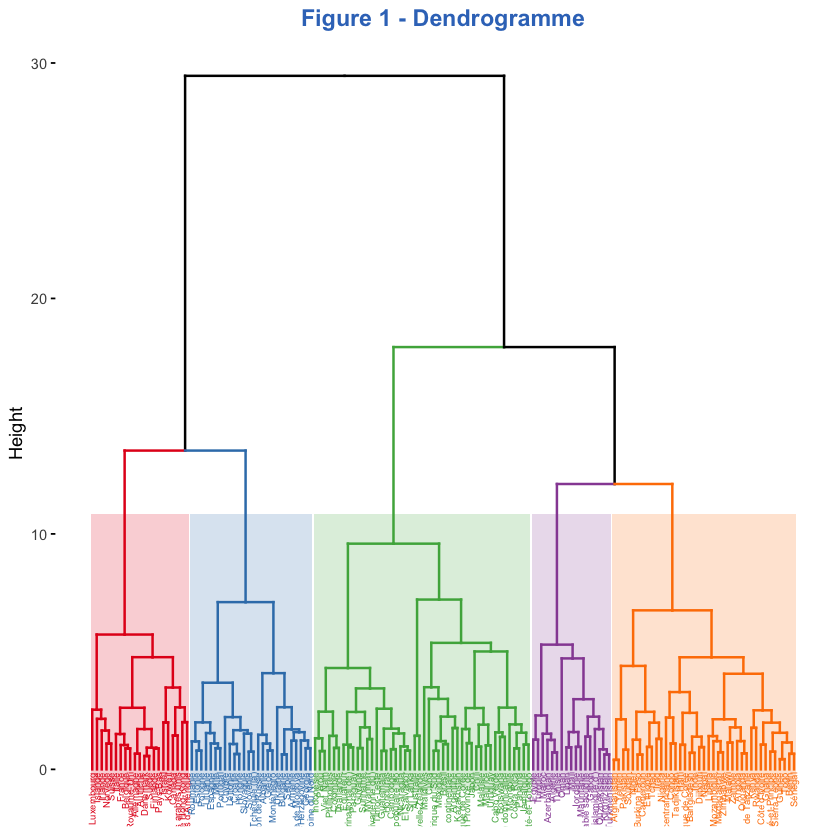

In [23]:
# data_scaled : centering data reduction: to avoid variables with high variance weighing on the results
data_scaled <- scale(data)

# d : distance matrix: criterion of resemblance between individuals
d <- dist(data_scaled, method = "euclidean")

# hc - Ward's criterion: criterion of resemblance between groups of individuals
data.hc <- hclust(d, method = "ward.D2" )

# Clustering
groupes.hc <- cutree(data.hc, k = 5)

# Number of members in each cluster
table(groupes.hc)

# Name of members in cluster 5
rownames(data_scaled)[groupes.hc == 5]

# Display of the dendrogram

figure1 <- fviz_dend(data.hc, k = 5, 
          cex = 0.4,                      # Label size
          palette = "Set1",               # Color palette see ?ggpubr::ggpar
          rect = TRUE, rect_fill = TRUE,  # Add rectangle around groups
          rect_border = "Set1",           # Rectangle color
          labels_track_height = 0.4       # Augment the room for labels
          ) + labs(title="Figure 1 - Dendrogramme") +theme(plot.title = element_text(color="#3876C2", size=14, face="bold",hjust = 0.5)) + ggsave("figure/figure1_dendrogramme.png", width = 11, height = 8)

plot(figure1)

In [24]:
# cluster1 : Contains the countries belonging to cluster 1
cluster1 <- rownames(data_scaled)[groupes.hc == 1]
cluster2 <- rownames(data_scaled)[groupes.hc == 2]
cluster3 <- rownames(data_scaled)[groupes.hc == 3]
cluster4 <- rownames(data_scaled)[groupes.hc == 4]
cluster5 <- rownames(data_scaled)[groupes.hc == 5]

# We put the country variable in order to add the cluster number of each country.
country <- rownames(data)
data <- cbind(country,data)

# We add the cluster number of each country
data$cluster[country %in% cluster1] <- 1
data$cluster[country %in% cluster2] <- 2
data$cluster[country %in% cluster3] <- 3
data$cluster[country %in% cluster4] <- 4
data$cluster[country %in% cluster5] <- 5

# Export : in csv format: List of countries and associated cluster
country_cluster <- subset(data, select=c(cluster))
write.csv(country_cluster, file = "export/country_cluster.csv")

# All columns are selected except the code_country and country column.
data <- data[,c(2:10)]

head(data)

,disp_ali_kcal_pers_day,disp_ali_prot_g_pers_day,prop_ani_disp_ali,evolution_pop_2015_2016,gdp_inhab,index_stab_pol,distance_fr_km,index_risk_country,cluster
Afghanistan,2087,58.26,20.96,2.73,583.8829,-2.75,5594.2234,8,1
Afrique du Sud,3020,85.33,42.65,1.31,5274.2572,-0.13,9306.6385,5,2
Albanie,3188,111.37,53.34,0.10,4054.1545,0.26,1603.9445,6,3
Algérie,3293,91.92,27.18,1.84,3916.8828,-1.14,1345.4604,6,4
Allemagne,3503,101.39,60.65,0.25,42456.3291,0.76,880.6348,1,5
Angola,2474,57.27,32.13,3.42,3710.6798,-0.39,6478.9539,6,1


In [25]:
data_scaled <- cbind(data_scaled, data$cluster)
colnames(data_scaled)[colnames(data_scaled)==""] <- "cluster"
head(data_scaled)

,disp_ali_kcal_pers_day,disp_ali_prot_g_pers_day,prop_ani_disp_ali,evolution_pop_2015_2016,gdp_inhab,index_stab_pol,distance_fr_km,index_risk_country,cluster
Afghanistan,-1.7132666,-1.1427961,-1.2937235,1.25230143,-0.6907884,-2.9063070,0.02387405,1.58907167,1
Afrique du Sud,0.3291573,0.1613282,0.0650324,0.01502879,-0.4343145,0.0246259,1.07310804,0.05159324,2
Albanie,0.6969250,1.4158311,0.7347005,-1.03926692,-0.5010308,0.4609098,-1.10389212,0.56408605,3
Algérie,0.9267798,0.4788080,-0.9040757,0.47682773,-0.5085370,-1.1052375,-1.17694708,0.56408605,4
Allemagne,1.3864894,0.9350347,1.1926307,-0.90856910,1.5988353,1.0202481,-1.30831999,-1.99837800,5
Angola,-0.8660875,-1.1904903,-0.5939861,1.85351138,-0.5198123,-0.2662300,0.27392402,0.56408605,1


## <font color=#FEB229> 2. Characterization of clusters</font> <a name="II2"></a>

### Calculation of centroids

In [26]:
# stats calculation function
stat.comp<-function(x,y)
{
  K <-length(unique(y))
  n <-length(x)
  m <-mean(x)
  TSS <-sum((x-m)^2)
  nk<-table(y)
  mk<-tapply(x,y,mean)
  BSS <-sum(nk* (mk-m)^2)
  result<-c(mk,100.0*BSS/TSS)
  names(result) <-c(paste("G",1:K),"% epl.")
  return(result)
}

# apply stat.comp to the variables of the original base and not to the centered and reduced variables
centroids <- as.data.frame(sapply(data[,1:8],stat.comp,y=groupes.hc))

# Exportation au format csv : centroïdes
write.csv(centroids[1:5,], file = "export/centroid.csv")

centroids

,disp_ali_kcal_pers_day,disp_ali_prot_g_pers_day,prop_ani_disp_ali,evolution_pop_2015_2016,gdp_inhab,index_stab_pol,distance_fr_km,index_risk_country
G 1,2359.51282,59.05000,22.51744,2.4269231,1151.4598,-0.9123077,5880.94351,6.384615
G 2,2785.23913,78.53304,45.79913,1.0660870,9841.6538,0.1297826,9434.70105,5.043478
G 3,3135.76923,94.10077,51.83692,-0.2003846,12161.8956,0.2100000,1759.66995,3.961538
G 4,3119.11765,90.25588,35.42118,2.1782353,5790.5999,-0.7594118,3741.79792,6.117647
G 5,3470.42857,110.41762,60.25286,0.8147619,50335.9589,0.6861905,2297.04759,2.000000
% epl.,67.85407,67.46196,68.12637,65.9803106,72.9364,42.8111836,72.83772,55.301765


### Notable variables of clusters

In [27]:
catdes(data.frame(as.factor(groupes.hc),data[,1:8]),num.var=1)


Link between the cluster variable and the quantitative variables
                              Eta2      P-value
gdp_inhab                0.7293640 7.248205e-40
distance_fr_km           0.7283772 9.407270e-40
prop_ani_disp_ali        0.6812637 8.840597e-35
disp_ali_kcal_pers_day   0.6785407 1.624727e-34
disp_ali_prot_g_pers_day 0.6746196 3.867419e-34
evolution_pop_2015_2016  0.6598031 9.340683e-33
index_risk_country       0.5530176 2.702410e-24
index_stab_pol           0.4281118 1.069437e-16

Description of each cluster by quantitative variables
$`1`
                            v.test Mean in category  Overall mean
evolution_pop_2015_2016   7.182652        2.4269231     1.2927517
index_risk_country        5.532572        6.3846154     4.8993289
gdp_inhab                -4.795240     1151.4597593 13216.9639142
index_stab_pol           -6.181806       -0.9123077    -0.1520134
disp_ali_prot_g_pers_day -8.029491       59.0500000    81.9812752
disp_ali_kcal_pers_day   -8.116518     2359.51

#### Heatmap

In [28]:
heatmap_centroids <- centroids[1:5,]
heatmap_centroids_scaled <- scale(heatmap_centroids)
heatmap_centroids_scaled_matrix <- data.matrix(heatmap_centroids_scaled)
heatmap_centroids_scaled_matrix

,disp_ali_kcal_pers_day,disp_ali_prot_g_pers_day,prop_ani_disp_ali,evolution_pop_2015_2016,gdp_inhab,index_stab_pol,distance_fr_km,index_risk_country
G 1,-1.4617561,-1.4348620,-1.4078392,1.0940121,-0.7455125,-1.1492782,0.4022991,0.9408801
G 2,-0.4490509,-0.4153876,0.1795675,-0.1786610,-0.3049336,0.3799803,1.5386637,0.1911893
G 3,0.3847798,0.3992129,0.5912399,-1.3630831,-0.1873011,0.4976986,-0.9155369,-0.4136111
G 4,0.3451695,0.1980244,-0.5280285,0.8614358,-0.5103155,-0.9249047,-0.2817232,0.7916458
G 5,1.1808576,1.2530122,1.1650603,-0.4137037,1.7480627,1.1965040,-0.7437027,-1.5101040



Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess

Warning message in heatmap.2(heatmap_centroids_scaled_matrix, main = "Figure 2 - Heatmap", :
“Discrepancy: Rowv is FALSE, while dendrogram is `both'. Omitting row dendogram.”Warning message in heatmap.2(heatmap_centroids_scaled_matrix, main = "Figure 2 - Heatmap", :
“Discrepancy: Colv is FALSE, while dendrogram is `column'. Omitting column dendogram.”

null device 
          1

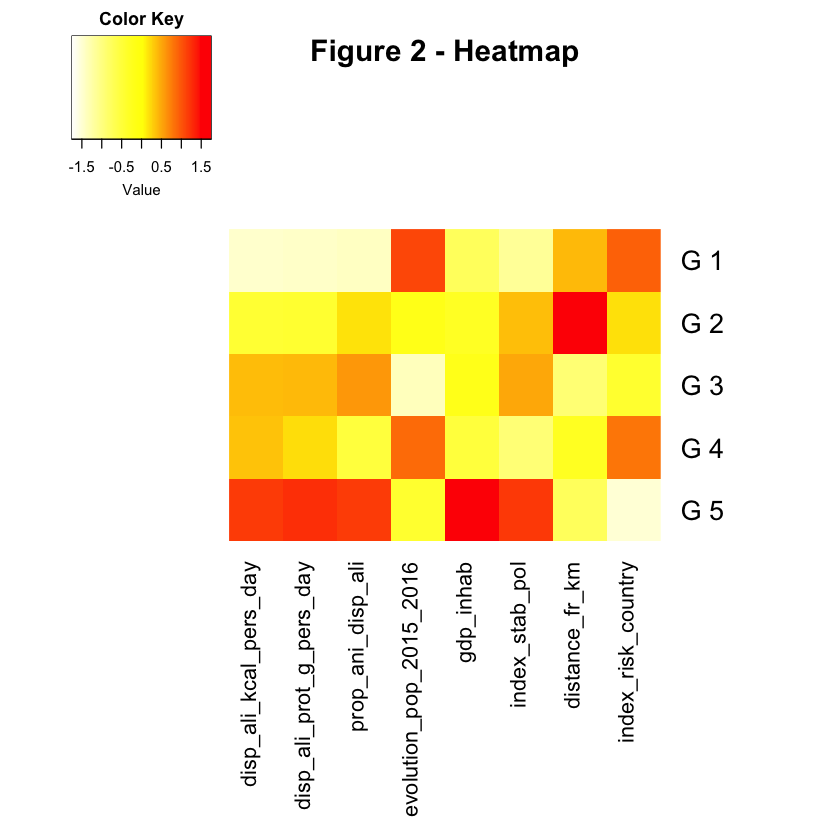

In [29]:
library("gplots")
library("heatmap.plus")
library("RColorBrewer")

# creates a own color palette from red to green
my_palette <- colorRampPalette(c("white", "yellow", "red"))(n = 299)

# (optional) defines the color breaks manually for a "skewed" color transition
col_breaks = c(seq(-1.6,0,length=100),  # for red
  seq(0.01,0.8,length=100),           # for yellow
  seq(0.81,1.6,length=100))             # for green

heatmap.2(heatmap_centroids_scaled_matrix, main = "Figure 2 - Heatmap",
  density.info="none",  # turns off density plot inside color legend
  trace="none",         # turns off trace lines inside the heat map
  margins =c(15,9),     # widens margins around plot
  col=my_palette,       # use on color palette defined earlier
  #breaks=col_breaks,    # enable color transition at specified limits
  #dendrogram="row",    # only draw a row dendrogram
  Colv=NA,             # turn off column clustering
  Rowv = NA)         # turn off row clustering

dev.off()               # close the PNG device

<div class="alert alert-warning" style="text-align: justify">
    <ul>
        <li>Reading on a line: </li>
            <ul>
                <li>The closer the box is to the yellow, the more variable characterizes the cluster.</li>
                <li>The closer the box is to the red, the more variable does not characterize the cluster.</li>
            </ul>
        <li>Reading on a column: </li>
            <ul>
               <li>The closer the box is to the green, the higher the value.</li>
                <li>The closer the box is to the red, the lower the value.</li>
            </ul>
    </ul>
</div>

### Caractérisation des clusters

<div class="alert alert-warning" style="text-align: justify">
    <ul>
        <li><strong>Cluster 1: Developing country far from France with high political instability</strong></li>
            <ul>
                <li>Evolution of the population: High</li>
                <li>Risk index in the country: High</li>
                <li>Distance to France: High</li>
                <li>GDP per inhabitant: Low</li>
                <li>Political Stability Index: Low</li>
                <li>Protein food availability: Low</li>
                <li>Food availability in kcal: Low</li>
                <li>Proportion of animal protein: Low</li>
            </ul>
        <li><strong>Cluster 2: Countries far from France with medium protein consumption</strong></li>
            <ul>
                <li>Distance to France: Strong</li>
                <li>Proportion of animal protein: Medium</li>
                <li>Political Stability Index: Medium</li>
            </ul>
        <li><strong>Cluster 3: Near France, with medium risk</strong></li>
            <ul>
                <li>Proportion of animal protein: Medium</li>
                <li>Food Protein Availability: High</li>
                <li>Food availability in kcal: High</li>
                <li>Political Stability Index: Medium</li>
                <li>Country Risk Index: Medium</li>
                <li>Distance to France: Low</li>
                <li>Population evolution: Negative</li>
            </ul>
        <li><strong>Cluster 4: High Risk Country</strong></li>
            <ul>
                <li>Evolution of the population: High</li>
                <li>Country Risk Index: High</li>
                <li>Food availability in kcal: High</li>
                <li>Political Stability Index: Low</li>
            </ul>
        <li><strong>Cluster 5: Developed countries near France</strong></li>
            <ul>
                <li>GDP per inhabitant: High</li>
                <li>Protein food availability: High</li>
                <li>Food availability in kcal: High</li>
                <li>Proportion of animal protein: High</li>
                <li>Political Stability Index: High</li>
                <li>Population evolution: Low</li>
                <li>Distance to France: Low</li>
                <li>Country Risk Index: Low</li>
            </ul>
    </ul>
</div>

<div class="alert alert-info" role="alert">
  <h2 class="alert-heading">III. Principal Component Analysis</h2>
</div><a name="III"></a>

## <font color=#FEB229> 1. Realization of the ACP</font> <a name="III1"></a>

In [30]:
# The reduced center data is used to neutralize the effects of the units.
data_scaled <- as.data.frame(data_scaled)
res.pca <- PCA(data_scaled[,1:8], graph = FALSE)

### Scree eigenvalues: Percentage of variances explained by each main axis

null device 
          1

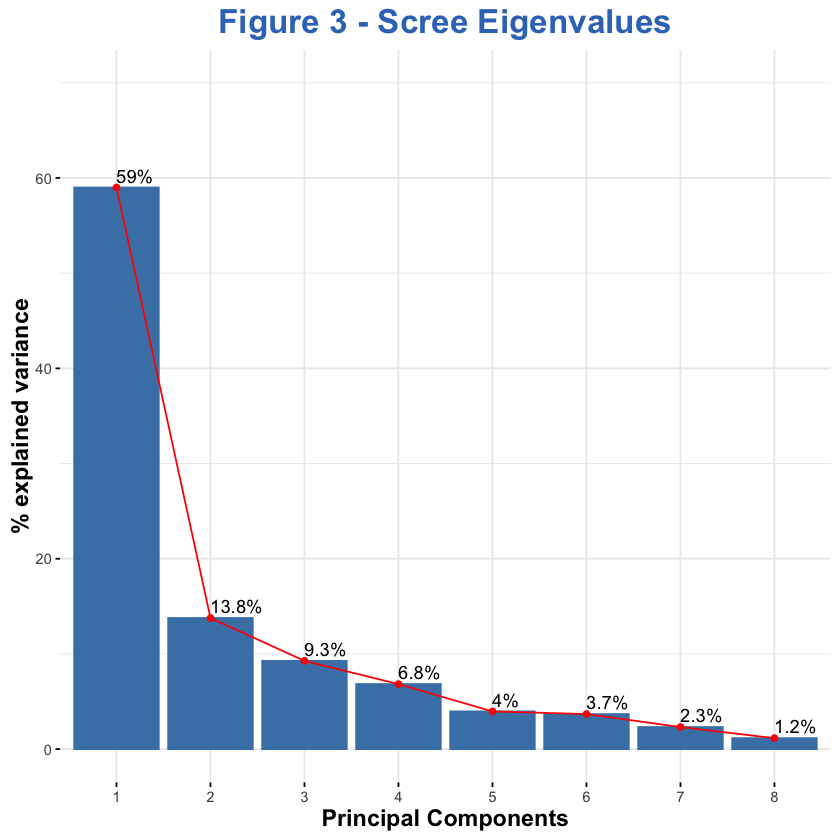

In [31]:
eig.val <- get_eigenvalue(res.pca)
figure3 <- fviz_screeplot(res.pca,addlabels=TRUE,ylim=c(0,70),linecolor='red') + labs(title = "Figure 3 - Scree Eigenvalues", x = "Principal Components", y = "% explained variance") + theme(plot.title = element_text(color="#3876C2", size=20, face="bold",hjust = 0.5),axis.title.x = element_text(color="black", size=14, face="bold",hjust = 0.5),axis.title.y = element_text(color="black", size=14, face="bold",vjust = 0.5))+ ggsave("figure/figure3_scree_eigenvalues.png", width = 15, height = 8)
plot(figure3)
dev.off()

<div class="alert alert-warning" style="text-align: justify">
    <strong> Elbow Method </strong> : from the 2nd factorial axis, we observe a setback (or bend) in the decay followed by a more regular decay. We will interpret the first two axes that explain 72.8% of the variance
</div>

### Quality of representation of the variables on the factorial axes

corrplot 0.84 loaded


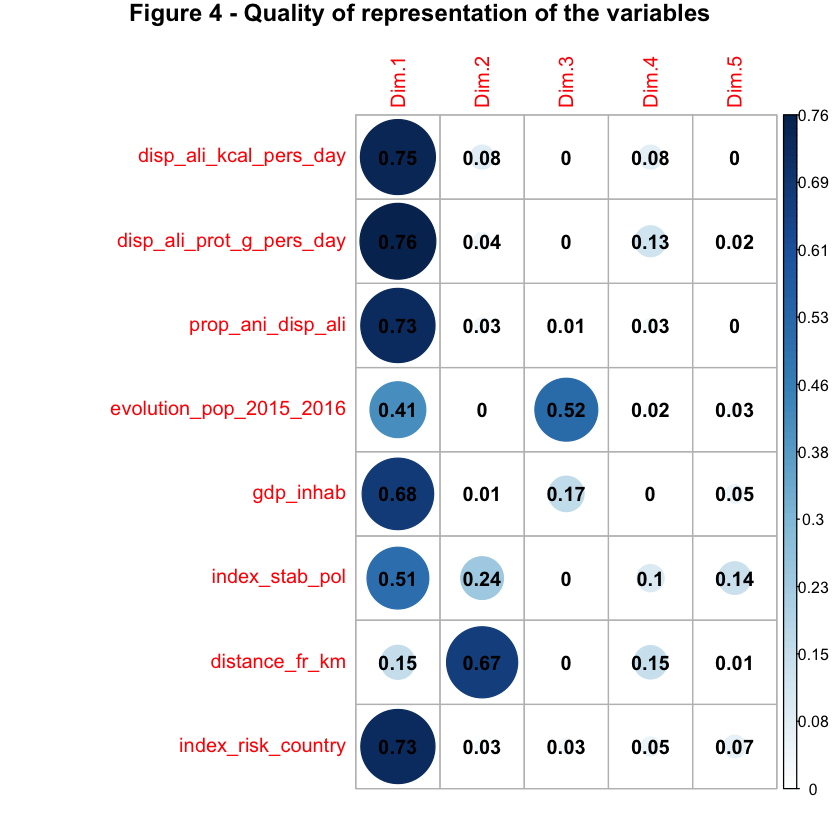

In [32]:
library("corrplot")
var <- get_pca_var(res.pca)
corrplot(var$cos2, is.corr=FALSE,addCoef.col = "black", title="Figure 4 - Quality of representation of the variables", mar=c(0,0,1,0))

<div class="alert alert-warning" style="text-align: justify">
    <ul>
        <li>disp_ali_prot_g_pers_day, disp_ali_kcal_pers_day, prop_ani_disp_ali, gdp_inhab, index_stab_pol index_risk_country are perfectly represented by the first principal component.</li>
        <li>distance_fr_km is very well represented by the second principal component..</li>
    </ul>
</div>

### Correlation circle

null device 
          1

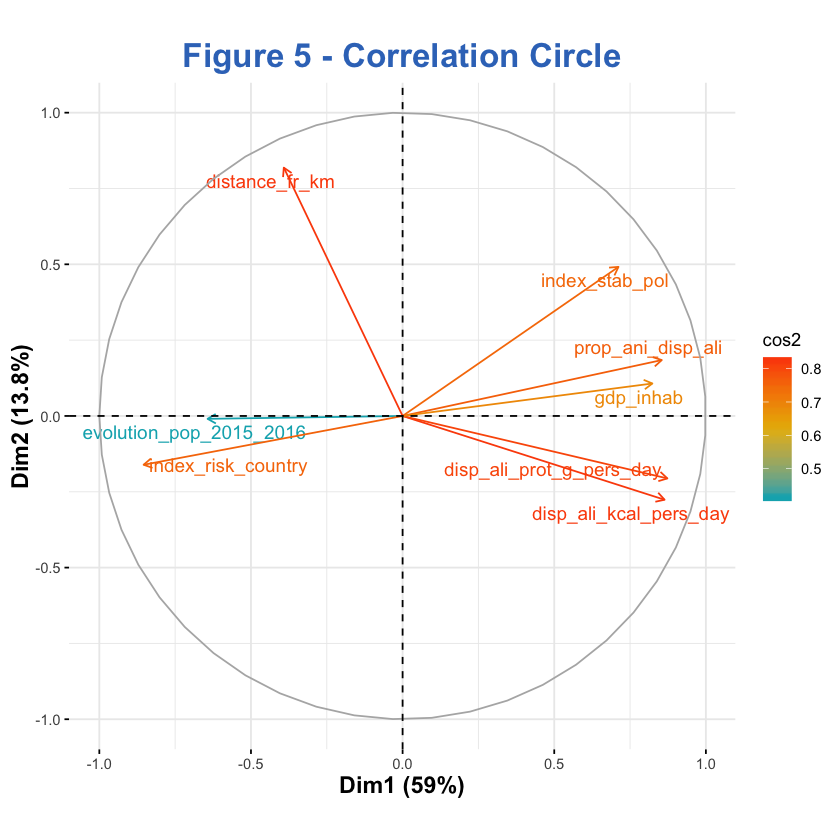

In [33]:
# Color according to cos2: quality of representation
figure5 <- fviz_pca_var(res.pca, col.var = "cos2",gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),repel = TRUE)+ labs(title = "Figure 5 - Correlation Circle") + theme(plot.title = element_text(color="#3876C2", size=20, face="bold",hjust = 0.5),axis.title.x = element_text(color="black", size=14, face="bold",hjust = 0.5),axis.title.y = element_text(color="black", size=14, face="bold",vjust = 0.5)) + ggsave("figure/figure5_correlation_circle.png", width = 15, height = 8)
plot(figure5)
dev.off()

<div class="alert alert-warning" style="text-align: justify">
    The correlation graph of the variables shows the relationships between all the variables and the factorial axes. It can be interpreted as follows:
<ul>
   <li> The <strong> positively correlated variables </strong> are grouped: </li>
       <ul>
           <li> disp_ali_prot_g_pers_day, disp_ali_kcal_pers_day </li>
           <li> prop_ani_disp_ali, gdp_inhab </li>
       </ul>
    <li> The <strong> negatively correlated variables </strong> are positioned on the opposite sides of the graph origin (opposite quadrants): </li>
       <ul> <li> index_risk_country and evolution_pop_2015_2016 compared to others </li> </ul>
    <li> The distance between the variables and the origin measures the <strong> quality of representation </strong> of the variables. Variables that are far from the origin are well represented by the ACP (red / orange color). All the variables (slightly less for evolution_pop_2015_2016: blue color) are well explained by the first two main components (Dim.1 & Dim.2) because they are positioned close to the correlation circle.</li>
</div>

<div class="alert alert-warning" style="text-align: justify">
<ul>
    <li><font color = 'red'> Dimension 1 symbolizes the quality of life in the country </font>: the countries on the far right are the countries where the quality of life is the best (high GDP per capita, high availability food in kcal / protein, high consumption of animal products, good political stability). </li>
    <li><font color = 'red'> Dimension 2 symbolizes the distance from the country to France. </font>: The lower a country is, the closer it is to France. </li>
    <li><strong><font color = 'red'> The countries we are interested in are therefore the rightmost countries (primarily because distance is secondary to the quality of life in the country) and the lowest. </font></strong></li>
</ul>
</div>

<div class="alert alert-warning" style="text-align: justify">
In general, the correlation circle is not made to interpret the correlations between the initial variables. It is made to interpret the axes of inertia F1, F2, etc.
To check the correlation between the variables, the correlation coefficients between the variables are calculated and displayed in the correlation matrix.
</div>

### Correlation matrix

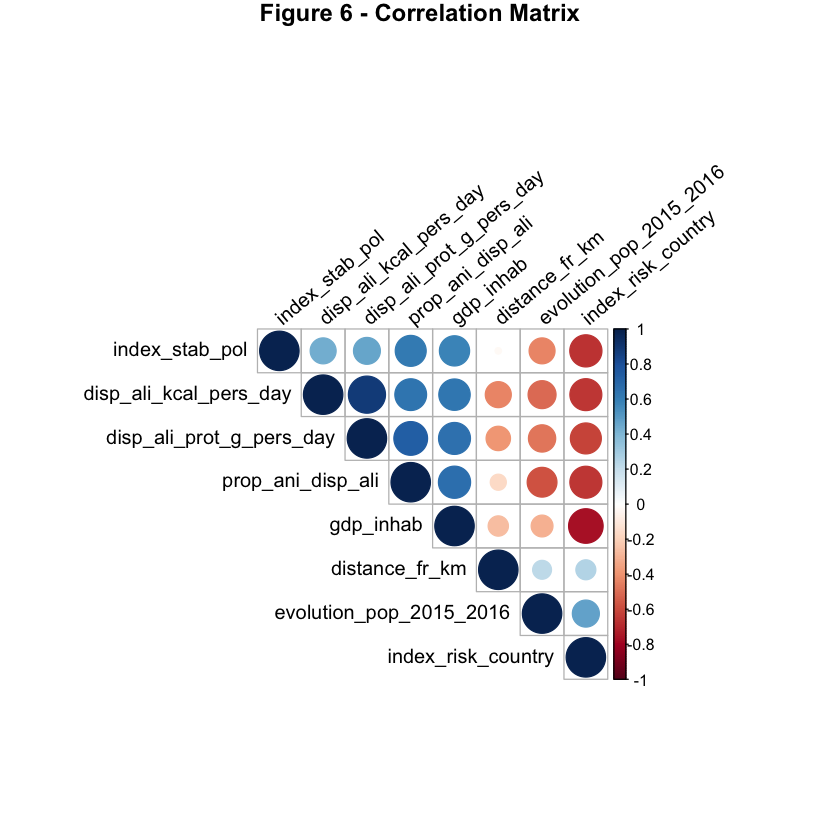

In [34]:
mcor <- cor(data_scaled[,1:8])
corrplot(mcor, type="upper", order="hclust", tl.col="black", tl.srt=40, title="Figure 6 - Correlation Matrix", mar=c(0,0,1,0))

<div class="alert alert-warning" style="text-align: justify">
We find the observations on the first factorial axis: the correlated variables (close to the first factorial axis) are grouped in the same direction:
<ul>
<li> On the right of the factorial plane and in blue: disp_ali_prot_g_pers_day, disp_ali_kcal_pers_day, prop_ani_disp_ali, gdp_inhab, index_stab_pol </li>
<li> On the left of the factorial plane and in red: index_risk_country, evolution_pop_2015_2016 </li>
</ul>
</div>

#### Biplot

null device 
          1

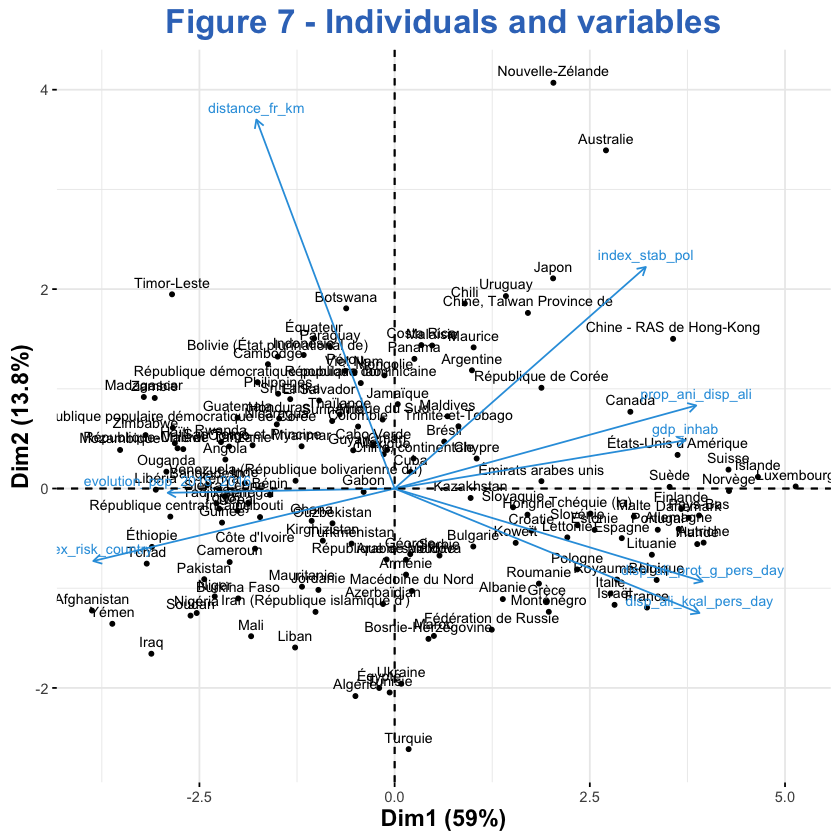

In [35]:
figure7 <- fviz_pca_biplot(res.pca,col.var = "#2E9FDF", pointsize = 1, labelsize = 3, axes = c(1,2)) + labs(title = "Figure 7 - Individuals and variables") + theme(plot.title = element_text(color="#3876C2", size=20, face="bold",hjust = 0.5),axis.title.x = element_text(color="black", size=14, face="bold",hjust = 0.5),axis.title.y = element_text(color="black", size=14, face="bold",vjust = 0.5)) + ggsave("figure/figure7_biplot.png", width = 15, height = 8)
plot(figure7)
dev.off()

null device 
          1

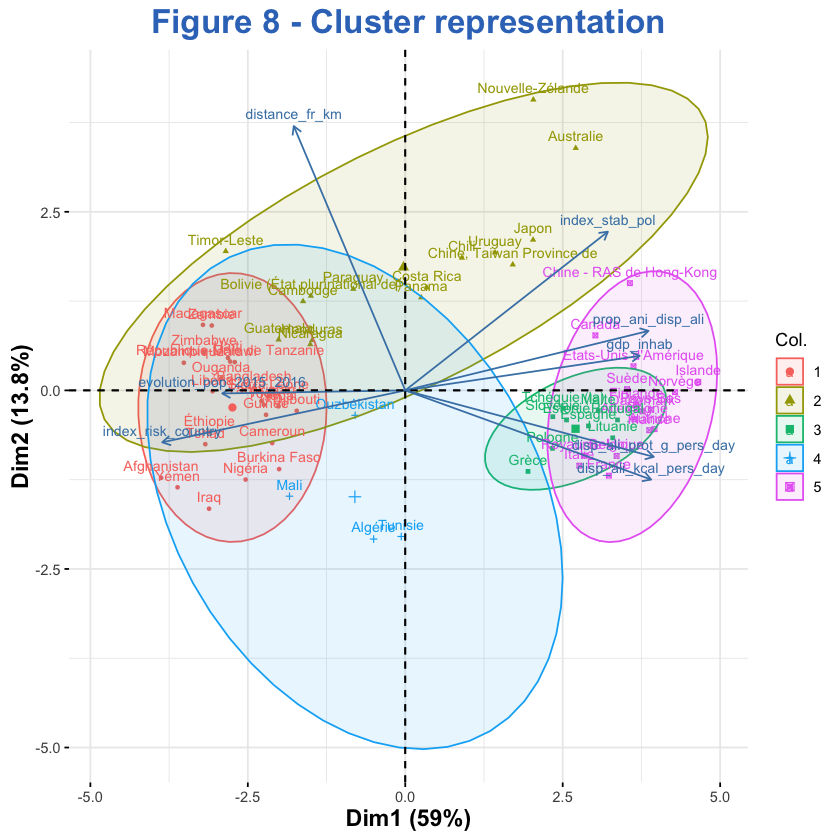

In [36]:
data <- transform(data, cluster = as.factor(cluster)) 
figure8 <- fviz_pca_biplot(res.pca, pointsize = 1, labelsize = 3, axes = c(1,2), select.ind = list(cos2 = 0.73),addEllipses = TRUE,col.ind = data$cluster, color_palette=c("#00AFBB", "#E7B800", "#FC4E07","#FC4E07","#FC4E07")) + labs(title = "Figure 8 - Cluster representation") + theme(plot.title = element_text(color="#3876C2", size=20, face="bold",hjust = 0.5),axis.title.x = element_text(color="black", size=14, face="bold",hjust = 0.5),axis.title.y = element_text(color="black", size=14, face="bold",vjust = 0.5)) + ggsave("figure/figure8_clusters.png", width = 15, height = 8)
plot(figure8)
dev.off()

<div class="alert alert-warning" style="text-align: justify">
<strong>Cluster 5 has the best characteristics for the exportation of chicken (high purchasing power and a diet rich in animal protein), the countries present in this cluster will be our first targets.</strong>
</div>

In [37]:
print(cluster5)

 [1] "Allemagne"                "Autriche"                
 [3] "Belgique"                 "Canada"                  
 [5] "Chine - RAS de Hong-Kong" "Danemark"                
 [7] "Émirats arabes unis"      "États-Unis d'Amérique"   
 [9] "Finlande"                 "France"                  
[11] "Irlande"                  "Islande"                 
[13] "Israël"                   "Italie"                  
[15] "Koweït"                   "Luxembourg"              
[17] "Norvège"                  "Pays-Bas"                
[19] "Royaume-Uni"              "Suède"                   
[21] "Suisse"                  


<div class="alert alert-warning" style="text-align: justify">
The 21 countries in cluster 5 are selected for a finer selection.
</div>

## <font color=#FEB229> 2. Country selection</font> <a name="III2"></a>

<div class="alert alert-success" style="text-align: justify">
In order to determine a small number of countries to which to export chickens, an ACP is again carried out with cluster countries 5.
</div>

In [38]:
head(data)

,disp_ali_kcal_pers_day,disp_ali_prot_g_pers_day,prop_ani_disp_ali,evolution_pop_2015_2016,gdp_inhab,index_stab_pol,distance_fr_km,index_risk_country,cluster
Afghanistan,2087,58.26,20.96,2.73,583.8829,-2.75,5594.2234,8,1
Afrique du Sud,3020,85.33,42.65,1.31,5274.2572,-0.13,9306.6385,5,2
Albanie,3188,111.37,53.34,0.10,4054.1545,0.26,1603.9445,6,3
Algérie,3293,91.92,27.18,1.84,3916.8828,-1.14,1345.4604,6,4
Allemagne,3503,101.39,60.65,0.25,42456.3291,0.76,880.6348,1,5
Angola,2474,57.27,32.13,3.42,3710.6798,-0.39,6478.9539,6,1


In [39]:
data_cluster5 <- subset(data, cluster == 5)

# Reduced centered data is used to neutralize the effects of the units.
data_cluster5_scaled <- as.data.frame(data_cluster5)
res5.pca <- PCA(data_cluster5_scaled[,c(3,5:8)], graph = FALSE)

<div class="alert alert-warning" style="text-align: justify">
We do not take into account the food availability in kcal / protein per person per day since we have seen that the variable is correlated with the proportion of animal proteins. We do not take the evolution of the population between 2015 and 2016 because it is unrepresentative in our analysis.
</div>

### Scree Plot Eigenvalues :  Percentage of variances explained by each principal axis

null device 
          1

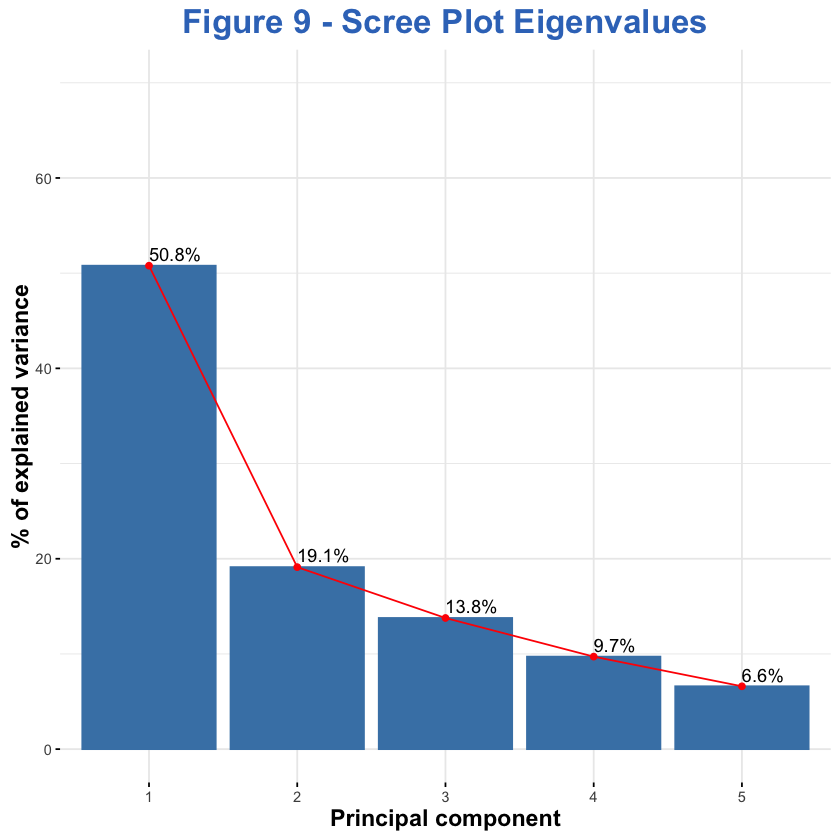

In [40]:
eig5.val <- get_eigenvalue(res5.pca)
figure9 <- fviz_screeplot(res5.pca,addlabels=TRUE,ylim=c(0,70),linecolor='red') + labs(title = "Figure 9 - Scree Plot Eigenvalues", x = "Principal component", y = "% of explained variance") + labs(title = "Figure 9 - Scree Plot Eigenvalues") + theme(plot.title = element_text(color="#3876C2", size=20, face="bold",hjust = 0.5),axis.title.x = element_text(color="black", size=14, face="bold",hjust = 0.5),axis.title.y = element_text(color="black", size=14, face="bold",vjust = 0.5)) + ggsave("figure/figure9_scree_plot.png", width = 15, height = 8)
plot(figure9)
dev.off()

<div class="alert alert-warning" style="text-align: justify">
    <strong> Elbow Method </strong> : from the 2nd factorial axis, we observe a setback (or bend) in the decay followed by a more regular decay. We will interpret the first two axes that explain 69.9% of the variance
</div>

### Quality of representation of the variables on the factorial axes

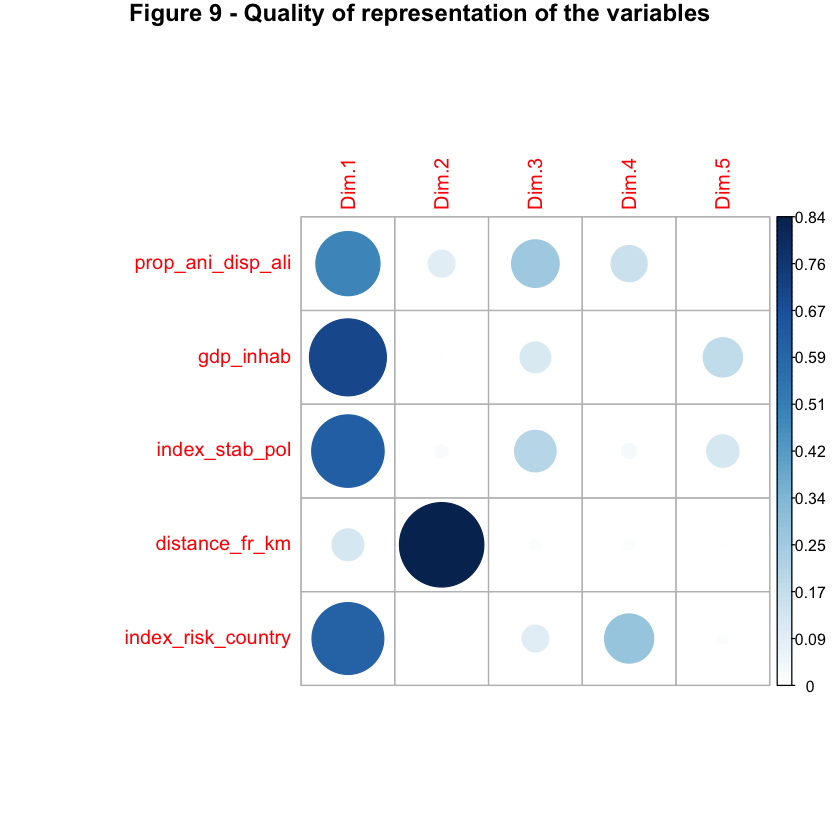

In [41]:
library("corrplot")
var5 <- get_pca_var(res5.pca)
corrplot(var5$cos2, is.corr=FALSE, title="Figure 9 - Quality of representation of the variables", mar=c(0,0,1,0))

<div class="alert alert-warning" style="text-align: justify">
    <ul>
    <li> disp_ali_kcal_pers_day, prop_ani_disp_ali, gdp_inhab, index_stab_pol, index_risk_country are perfectly represented by the first principal component. </li>
    <li> distance_fr_km is very well represented by the second principal component. </li>
</ul>
</div>

### Correlation Circle

null device 
          1

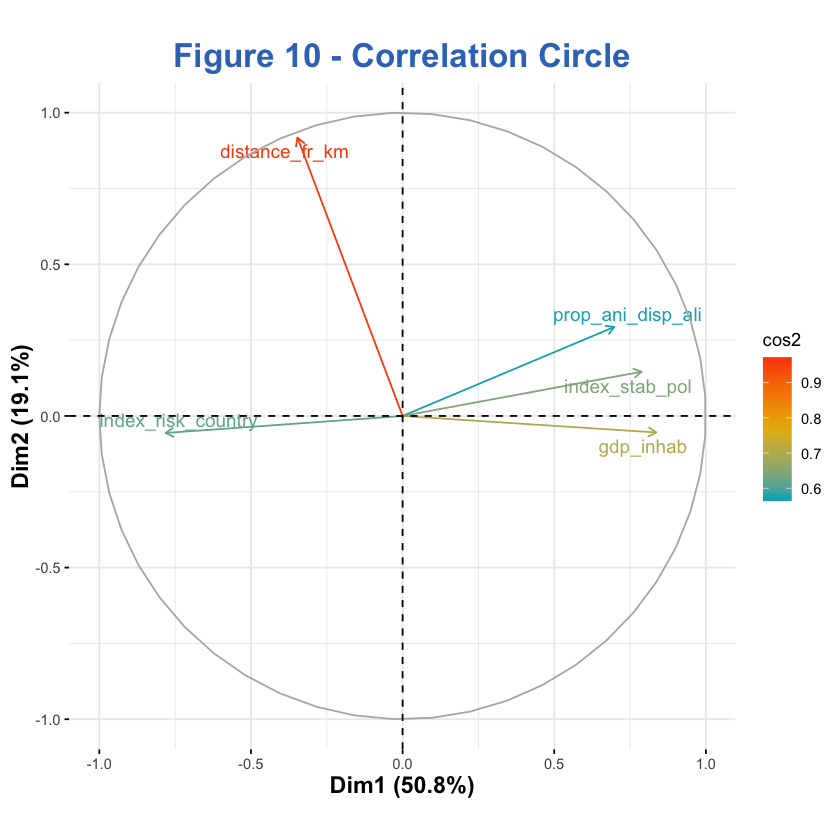

In [42]:
# Color according to cos2: quality of representation
figure10 <- fviz_pca_var(res5.pca, col.var = "cos2",gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),repel = TRUE) + labs(title = "Figure 10 - Correlation Circle") + theme(plot.title = element_text(color="#3876C2", size=20, face="bold",hjust = 0.5),axis.title.x = element_text(color="black", size=14, face="bold",hjust = 0.5),axis.title.y = element_text(color="black", size=14, face="bold",vjust = 0.5)) + ggsave("figure/figure10_correlation_circle.png", width = 15, height = 8)
plot(figure10)
dev.off()

<div class="alert alert-warning" style="text-align: justify">
    The correlation graph of the variables shows the relationships between all the variables and the factorial axes. It can be interpreted as follows:
<ul>
   <li> The <strong> positively correlated variables </strong> are grouped: </li>
       <ul>
           <li> prop_ani_disp_ali, gdp_inhab, index_stab_pol </li>
       </ul>
    <li> The <strong> negatively correlated variables </strong> are positioned on the opposite sides of the graph origin (opposite quadrants): </li>
       <ul> 
           <li> index_risk_country </li> 
       </ul>
    <li> The distance between the variables and the origin measures the <strong> quality of representation </strong> of the variables. All variables are well explained by the first two principal components (Dim.1 & Dim.2) because they are positioned near the correlation circle.</li>
    </ul>
</div>

<div class="alert alert-warning" style="text-align: justify">
<ul>
    <li><font color = 'red'> Dimension 1 symbolizes the quality of life in the country </font>: the countries on the far right are the countries where the quality of life is the best (high GDP per capita, high availability food in kcal / protein, high consumption of animal products, good political stability). </li>
    <li><font color = 'red'> Dimension 2 symbolizes the distance from the country to France. </font>: The lower a country is, the closer it is to France.</li>
    <li><strong><font color = 'red'> The countries we are interested in are therefore the rightmost countries (primarily because distance is secondary to the quality of life in the country) and the lowest. </font></strong></li>
</ul>
</div>

null device 
          1

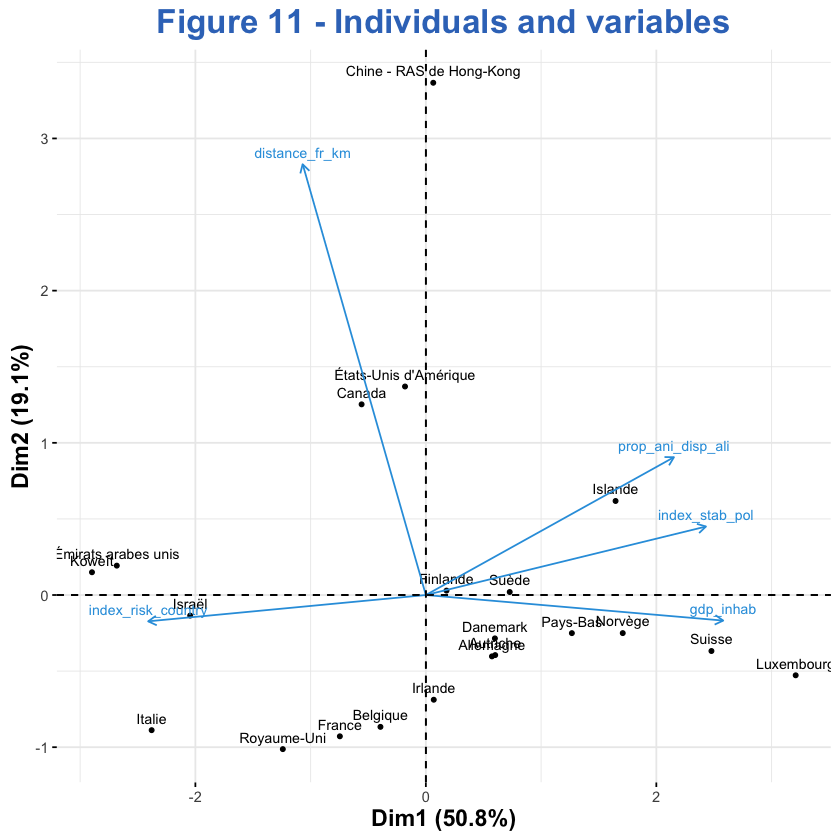

In [43]:
figure11 <- fviz_pca_biplot(res5.pca,col.var = "#2E9FDF", pointsize = 1, labelsize = 3, axes = c(1,2)) + labs(title = "Figure 11 - Individuals and variables") + theme(plot.title = element_text(color="#3876C2", size=20, face="bold",hjust = 0.5),axis.title.x = element_text(color="black", size=14, face="bold",hjust = 0.5),axis.title.y = element_text(color="black", size=14, face="bold",vjust = 0.5)) + ggsave("figure/figure11_biplot.png", width = 15, height = 8)
plot(figure11)
dev.off()

<div class="alert alert-warning" style="text-align: justify">
<font color = 'red'> The countries that are likely to be part of our chicken market are therefore <strong> Luxembourg, Switzerland, Norway and the Netherlands. </strong></font>
</div>

<div class="alert alert-info" role="alert">
  <h2 class="alert-heading">IV. Statistical Tests</h2>
</div><a name="IV"></a>

In [44]:
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

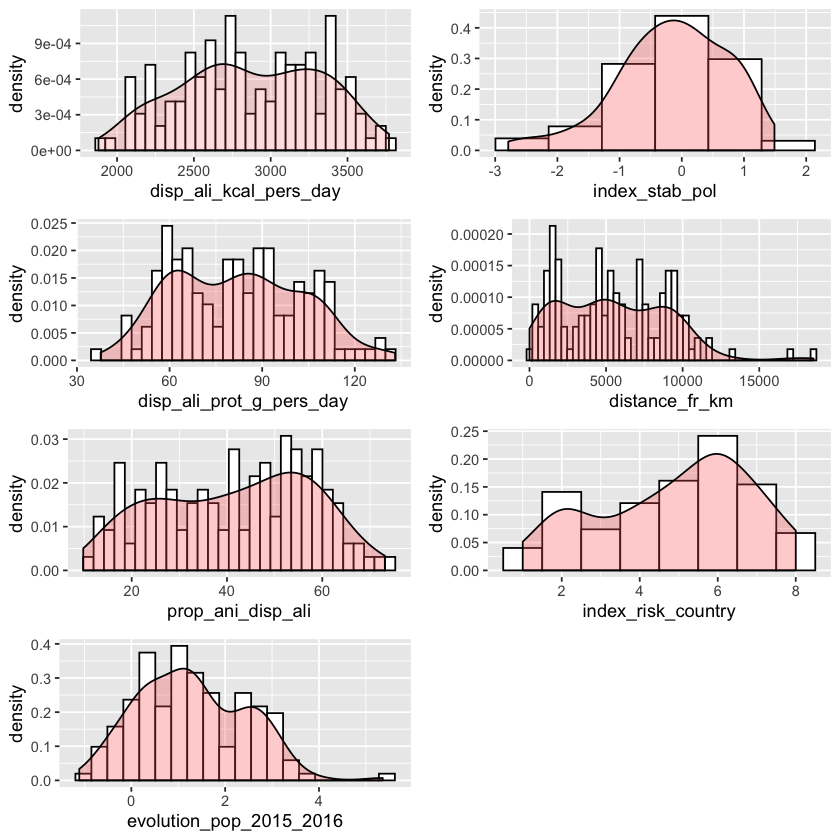

In [45]:
p1 <- ggplot(data, aes(x=disp_ali_kcal_pers_day)) + geom_histogram(aes(y=..density..), colour="black", fill="white",bins=30)+
 geom_density(alpha=.2, fill="#FF6666") +ggsave("figure/figure12_histo.png", width = 15, height = 8)
p2 <- ggplot(data, aes(x=disp_ali_prot_g_pers_day)) + geom_histogram(aes(y=..density..), colour="black", fill="white",bins=30)+
 geom_density(alpha=.3, fill="#FF6666") 
p3 <- ggplot(data, aes(x=prop_ani_disp_ali))+ geom_histogram(aes(y=..density..), colour="black", fill="white",bins=30)+
 geom_density(alpha=.3, fill="#FF6666") 
p4 <- ggplot(data, aes(x=evolution_pop_2015_2016))+ geom_histogram(aes(y=..density..), colour="black", fill="white",bins=20)+
 geom_density(alpha=.3, fill="#FF6666") 
p5 <- ggplot(data, aes(x=index_stab_pol)) + geom_histogram(aes(y=..density..), colour="black", fill="white",bins=6)+
 geom_density(alpha=.3, fill="#FF6666") 
p6 <- ggplot(data, aes(x=distance_fr_km)) + geom_histogram(aes(y=..density..), colour="black", fill="white",bins=50)+
 geom_density(alpha=.3, fill="#FF6666") 
p7 <- ggplot(data, aes(x=index_risk_country)) + geom_histogram(aes(y=..density..), colour="black", fill="white",bins=8)+
 geom_density(alpha=.3, fill="#FF6666") 
multiplot(p1, p2, p3, p4,p5,p6,p7, cols=2) 

## <font color=#FEB229> 1. Suitability test</font> <a name="IV1"></a>

<div class="alert alert-warning" style="text-align: justify">
In Part I, we referred to the fact that the index of political stability seems to be reduced. Moreover, according to the histograms above, that of the index of political stability comes closest to a normal law.
</div>

<div class="alert alert-warning" style="text-align: justify">
To evaluate whether this variable can be considered Gaussian, we can study the difference between the distribution function of a normal distribution and that estimated in our sample: the empirical distribution function.
The larger the quantity, the more inclined one is to reject the hypothesis that the sample is Gaussian. The Kolmogorov-Smirnov test, which makes it possible to test any probability distribution, is based on the maximum difference observed between the two distribution functions, the empirical and the theoretical tested.
<ul> <li><strong>The hypothesis HO: F = F0 : </strong></li>
        <ul>
            <li>F: empirical distribution function of the sample</li>
            <li>F0: distribution function of a normal distribution</li>
        </ul>
    <strong><li>Hypothesis H1: F different from FO.</li></strong>
    <strong><li>Threshold of significance: Alpha: 5%</li></strong>
    <strong><li>Type of test: Bilateral test </li></strong>
</ul>
</div>

<div class="alert alert-warning" style="text-align: justify">
The test statistic is the upper limit of the difference in absolute value between the empirical distribution function of the sample and the distribution function of a normal distribution.
    </div>

<img src="image/statistique_kolmogorov.png">

In [46]:
political_stability <- transform(political_stability, index_stab_pol = as.numeric(index_stab_pol))
ks.test(political_stability$index_stab_pol,"pnorm",mean=mean(political_stability$index_stab_pol))

Warning message in ks.test(political_stability$index_stab_pol, "pnorm", mean = mean(political_stability$index_stab_pol)):
“ties should not be present for the Kolmogorov-Smirnov test”


	One-sample Kolmogorov-Smirnov test

data:  political_stability$index_stab_pol
D = 0.070154, p-value = 0.2868
alternative hypothesis: two-sided


<div class="alert alert-warning" style="text-align: justify">
The p-value is greater than 5%.
Therefore, we can not  reject the assumption of normality at the 5% test level.
The Political Stability Index follows a normal pattern.
 </div>

## <font color=#FEB229> 2. Comparison test </font> <a name="IV2"></a>

<div class="alert alert-warning" style="text-align: justify">
According to the graph of the individuals on the factorial plane, the clusters 3 and 5 are close. A comparison test is done to affirm or not the hypothesis.
 </div>

In [47]:
clust3_stab_pol <- filter(data, cluster == '3')$index_stab_pol
clust5_stab_pol <- filter(data, cluster == '5')$index_stab_pol

<div class="alert alert-success" style="text-align: justify">
If we want to compare two samples (i.i.d) Gaussian, we just have to compare their parameters: their mean μ3 and μ5, and their variance $ σ3 ^ {2} $ and $ σ5 ^ {2} $.
The most classic methodology is to perform sequentially:
<ul>
    <li> A test of equality of variances. </li>
    <li> A test of equality of means. </li>
</ul>
    
If the variances are not considered equal, the two samples do not have the same law. If the variances are considered equal then it is possible to estimate this variance on both samples at once, and to test the equality of the averages using this overall empirical variance.
</div>

### Equality test of variances

<div class="alert alert-success" style="text-align: justify">
We ignore the sign of the potential difference between the two variances of the indices of political stability. Here, a bilateral alternative hypothesis is appropriate.
 </div>

<div class="alert alert-warning" style="text-align: justify">
<ul> <li><strong>The hypothesis H0 :  $ σ3 ^ {2} $ = $ σ5 ^ {2} $: </strong></li>
        <ul>
            <li>$ σ3 ^ {2} $: cluster variance 3e</li>
            <li>$ σ5 ^ {2} $: cluster variance 3</li>
        </ul>
    <strong><li>Hypothesis H1: $ σ3 ^ {2} $ different from $ σ5 ^ {2} $</li></strong>
    <strong><li>Threshold of significance: Alpha: 5%</li></strong>
    <strong><li>Type of test: Bilateral test </li></strong>
</ul>
</div>

<div class="alert alert-warning" style="text-align: justify">
The test statistic is the ratio $ σ3 ^ {2} $ / $ σ5 ^ {2} $. Hypothesis H0 will reject all the more easily the equality of the variances that this ratio will move away from 1.
 </div>

In [48]:
var.test(clust3_stab_pol,clust5_stab_pol)


	F test to compare two variances

data:  clust3_stab_pol and clust5_stab_pol
F = 1.5331, num df = 25, denom df = 20, p-value = 0.3327
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.6398532 3.5267133
sample estimates:
ratio of variances 
           1.53305 


<div class="alert alert-warning" style="text-align: justify">
Since the p-value is 0.44, we do not reject the equality of the variances at the 5% test level.
The variances $ σ3 ^ {2} $ and $ σ5 ^ {2} $ can be considered equal.
 </div>

### Mean equality test

<div class="alert alert-success" style="text-align: justify">
The equality of the means is then tested using the t.test command.
According to the calculation of the centroids and the correlation circle in the factorial plane, the sign of the potential difference between the two means of the political stability indices is negative: μ5> μ3: cluster 5 has a higher mean index of political stability than cluster 3. Here, a bilateral alternative hypothesis is appropriate.
 </div>

<div class="alert alert-warning" style="text-align: justify">
<ul> <li><strong>The hypothesis H0 :  μ3 = μ5 : </strong></li>
        <ul>
            <li>μ3: mean cluster 3</li>
            <li>μ5: mean cluster 5</li>
        </ul>
    <strong><li>Hypothesis H1 : μ5 > μ3</li></strong>
    <strong><li>Threshold of significance: Alpha: 5%</li></strong>
    <strong><li>Type of test: Bilateral test </li></strong>
</ul>
</div>

In [49]:
t.test(clust5_stab_pol,clust3_stab_pol,var.equal=TRUE,alternative="greater")


	Two Sample t-test

data:  clust5_stab_pol and clust3_stab_pol
t = 2.5661, df = 45, p-value = 0.006843
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.1645391       Inf
sample estimates:
mean of x mean of y 
0.6861905 0.2100000 


<div class="alert alert-warning" style="text-align: justify">
The p-value is equal to 0.006. Therefore we reject the assumption of equality of the means at the 5% test level.
The means μ3 and μ5 can not be considered equal.
</div>

<div class="alert alert-warning" style="text-align: justify">
<strong><font color = 'red'> In conclusion:
The Gaussian aspect of the index_stab_politic variable was verified with a test of adequacy to a normal law thanks to the Kolmogorov-Smirnov test. For clusters 3 and 5, the hypothesis of equality of variances has been verified. contrary to the hypothesis of equality of means: clusters 3 and 5 do not follow the same distribution and are therefore distinct. </font></strong>
</div>